In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU, Conv2DTranspose, Reshape
from keras.utils.vis_utils import plot_model

In [21]:
(trainX, trainy), (_, _) = mnist.load_data()

In [22]:
# filter value
filter_arr_train = trainy == 8
# train value
x_train = trainX[filter_arr_train]

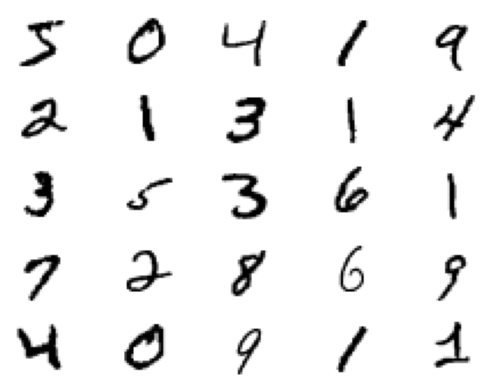

In [23]:
for i in range(25):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis
    plt.axis('off')
    # ploting data
    plt.imshow(trainX[i], cmap='gray_r')
    
plt.show()

# Discriminator

In [24]:
def discriminator(shape = (28, 28, 1)):
    # Design discriminator network
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape = shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [25]:
disc_model = discriminator()
plot_model(model=disc_model, to_file='discriminator.png', show_shapes=True, show_layer_names=True)
disc_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [26]:
# load and prepare mnist training images
def load_real_samples(dataX):
 # expand to 3d, e.g. add channels dimension
 X = np.expand_dims(dataX, axis=-1)
 # convert from unsigned ints to floats
 X = X.astype('float32')
 # scale from [0,255] to [0,1]
 X = X / 255.0
 return X

In [27]:
# select real samples
def generate_real_samples(dataset, n_samples):
 # choose random instances
 ix = np.random.randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 # generate 'real' class labels (1)
 y = np.ones((n_samples, 1))
 return X, y
 
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
 # generate uniform random numbers in [0,1]
 X = np.random.rand(28 * 28 * n_samples)
 # reshape into a batch of grayscale images
 X = X.reshape((n_samples, 28, 28, 1))
 # generate 'fake' class labels (0)
 y = np.zeros((n_samples, 1))
 return X, y

In [28]:
half_batch = int(256 / 2)
x_train = load_real_samples(x_train)
model = discriminator()

# manually enumerate epochs
for i in range(50):
 # get randomly selected 'real' samples
 X_real, y_real = generate_real_samples(x_train, half_batch)
 # update discriminator on real samples
 _, real_acc = model.train_on_batch(X_real, y_real)
 # generate 'fake' examples
 X_fake, y_fake = generate_fake_samples(half_batch)
 # update discriminator on fake samples
 _, fake_acc = model.train_on_batch(X_fake, y_fake)
 # summarize performance
 print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

>1 real=56% fake=75%
>2 real=60% fake=82%
>3 real=70% fake=86%
>4 real=70% fake=98%
>5 real=75% fake=99%
>6 real=66% fake=100%
>7 real=81% fake=100%
>8 real=75% fake=100%
>9 real=84% fake=100%
>10 real=85% fake=100%
>11 real=87% fake=100%
>12 real=90% fake=100%
>13 real=93% fake=100%
>14 real=91% fake=100%
>15 real=93% fake=100%
>16 real=93% fake=100%
>17 real=91% fake=100%
>18 real=95% fake=100%
>19 real=98% fake=100%
>20 real=97% fake=100%
>21 real=98% fake=100%
>22 real=99% fake=100%
>23 real=96% fake=100%
>24 real=98% fake=100%
>25 real=98% fake=100%
>26 real=99% fake=100%
>27 real=98% fake=100%
>28 real=98% fake=100%
>29 real=99% fake=100%
>30 real=100% fake=100%
>31 real=99% fake=100%
>32 real=100% fake=100%
>33 real=100% fake=100%
>34 real=100% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100

# Generator

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

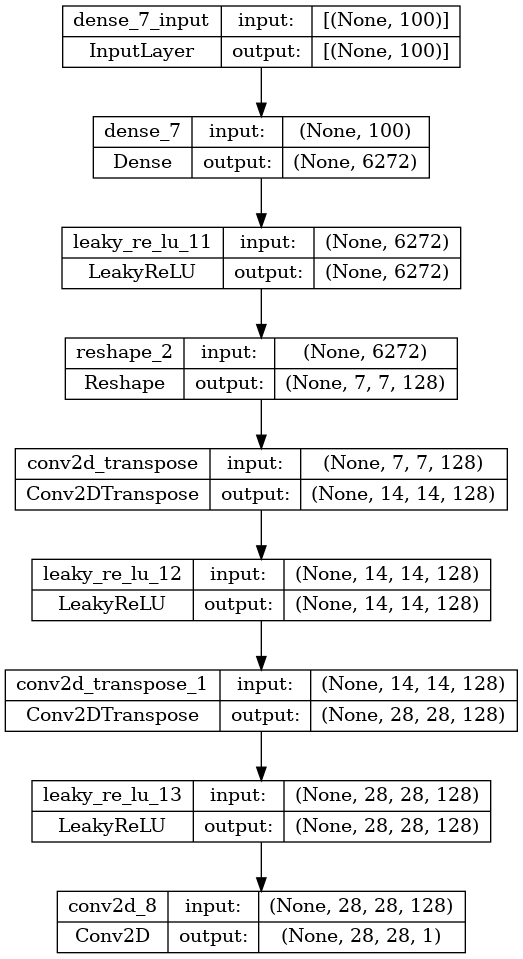

In [33]:
def generator(latent_dim):
    model = Sequential()
	# foundation for 7x7 image
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim = latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    # upsample to 14*14
    model.add(Conv2DTranspose(128, (4, 4), strides = (2, 2), padding = "same"))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28*28
    model.add(Conv2DTranspose(128, (4, 4), strides = (2, 2), padding = "same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (2, 2), activation = 'sigmoid', padding = 'same'))

    return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator.png', show_shapes=True, show_layer_names=True)